<a href="https://colab.research.google.com/github/simjeongho/XceptionV2/blob/main/PracticeAlbumentaions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
!wget https://www.sciencenews.org/wp-content/uploads/2020/03/033120_HT_covid-cat_feat-1028x579.jpg
!ls -lia

--2022-11-08 08:29:52--  https://www.sciencenews.org/wp-content/uploads/2020/03/033120_HT_covid-cat_feat-1028x579.jpg
Resolving www.sciencenews.org (www.sciencenews.org)... 23.185.0.2, 2620:12a:8000::2
Connecting to www.sciencenews.org (www.sciencenews.org)|23.185.0.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61745 (60K) [image/jpeg]
Saving to: ‘033120_HT_covid-cat_feat-1028x579.jpg’

033120_HT_covid-cat 100%[===================>]  60.30K  --.-KB/s    in 0.001s  

2022-11-08 08:29:52 (40.4 MB/s) - ‘033120_HT_covid-cat_feat-1028x579.jpg’ saved [61745/61745]

total 80
2490374 drwxr-xr-x 1 root root  4096 Nov  8 08:29 .
6162590 drwxr-xr-x 1 root root  4096 Nov  8 08:29 ..
6162575 -rw-r--r-- 1 root root 61745 Mar 31  2020 033120_HT_covid-cat_feat-1028x579.jpg
2883591 drwxr-xr-x 4 root root  4096 Oct 28 13:36 .config
2490375 drwxr-xr-x 1 root root  4096 Oct 28 13:37 sample_data


(579, 1028, 3)


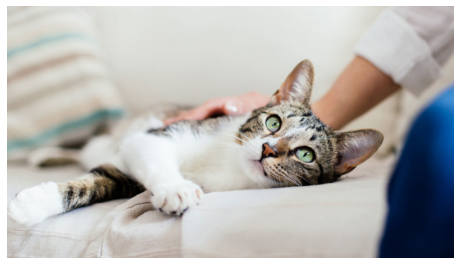

In [3]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

org_image = cv2.cvtColor(cv2.imread('033120_HT_covid-cat_feat-1028x579.jpg'), cv2.COLOR_BGR2RGB)

def show_image(image):
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis('off')
    
show_image(org_image)
print(org_image.shape)

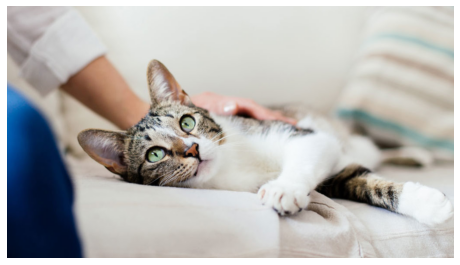

In [5]:
import albumentations as A

augmentor = A.HorizontalFlip(p=0.5)
aug_img = augmentor(image=org_image)['image'] # 원본 이미지를 augmentor객체에 넣어준다. 키 값을 넣어주어야 한다. 아니면 딕셔너리 안의 키값을 반환하게 만들어준다. 
show_image(aug_img)

In [6]:
aug_img

array([[[187, 178, 179],
        [187, 178, 179],
        [187, 178, 179],
        ...,
        [194, 205, 201],
        [193, 204, 200],
        [192, 203, 199]],

       [[187, 178, 179],
        [187, 178, 179],
        [187, 178, 179],
        ...,
        [195, 204, 201],
        [194, 205, 201],
        [193, 204, 200]],

       [[187, 178, 179],
        [187, 178, 179],
        [187, 178, 179],
        ...,
        [197, 206, 203],
        [196, 205, 202],
        [194, 205, 201]],

       ...,

       [[  2,   9,  28],
        [  2,   9,  28],
        [  2,   9,  28],
        ...,
        [182, 173, 168],
        [196, 189, 183],
        [193, 186, 180]],

       [[  2,   9,  28],
        [  2,   9,  28],
        [  2,   9,  28],
        ...,
        [179, 170, 165],
        [189, 182, 176],
        [184, 177, 171]],

       [[  2,   9,  28],
        [  2,   9,  28],
        [  2,   9,  28],
        ...,
        [193, 184, 179],
        [198, 191, 185],
        [189, 182, 176]]

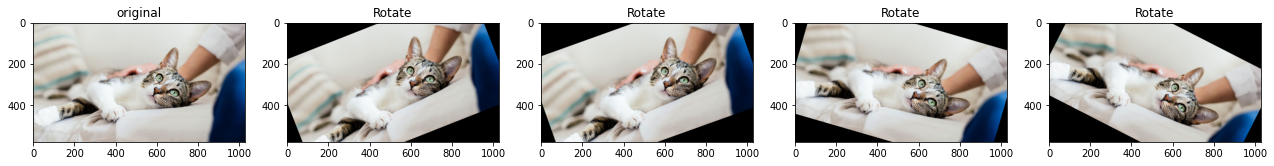

In [7]:
# 여러개의 이미지를 subplots로 시각화 # ncols로 들어오는 만큼 subplot으로 표현하겠다. 
def show_images(images, labels, ncols=4, title=None):
    figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i])
        axs[i].set_title(labels[i])

# augmentor로 입력된 albumentations augmentation을 반복 수행 변환 객체를 파라미터로 준다. 
def repeat_aug(count=4, org_image=None, label=None, augmentor=None):
    image_list = [org_image]
    label_list = ['original']
    
    for i in range(count):
        aug_image = augmentor(image=org_image)['image']
        image_list.append(aug_image)
        label_list.append(label)
              
    show_images(image_list, label_list, ncols=count+1)
    
augmentor = A.Rotate(limit=90, p=1, border_mode=cv2.BORDER_CONSTANT)# 90도 범위하에서 rotate 시킨다. 
#aug_image = augmentor(image=org_image)['image']

repeat_aug(count=4, org_image=org_image, label='Rotate', augmentor=augmentor)

### Augmentation 적용 확률 적용 및 HorizontalFlip과 VerticalFlip
* p 인자를 통해 해당 augmentation을 적용할지, 원본 image를 그대로 유지할 지의 확률 설정. 
* HorizontalFlip은 좌우 반전, VerticalFlip은 상하 반전

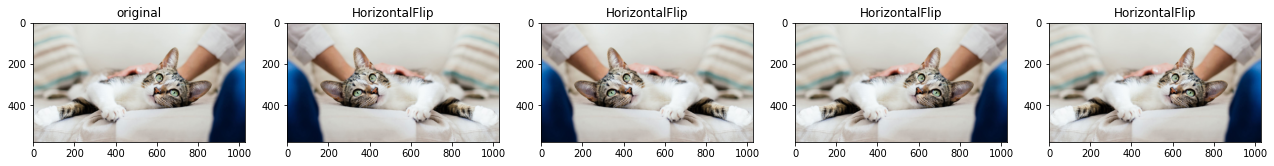

In [8]:
import albumentations as A

augmentor = A.HorizontalFlip(p=0.5)
aug_image = augmentor(image=org_image)['image']

repeat_aug(count=4, org_image=org_image, label='HorizontalFlip', augmentor=augmentor)

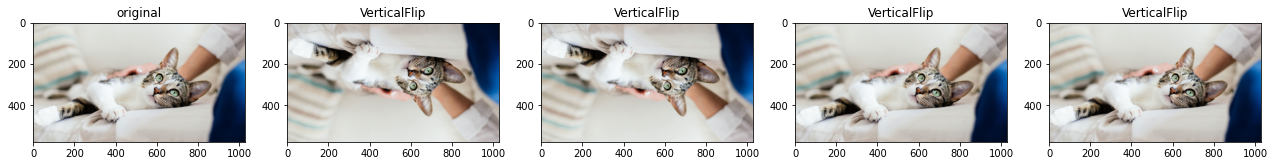

In [9]:
import albumentations as A

augmentor = A.VerticalFlip(p=0.5)
repeat_aug(count=4, org_image=org_image, label='VerticalFlip', augmentor=augmentor)

### Rotation
* 임의 각도로 회전 시키는 Rotate와 임의 90도 각도(90도 간격 회전 90, 180, 270도)로 회전시키는 RandomRotate90

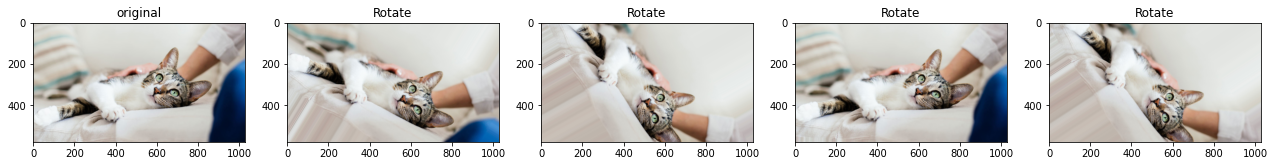

In [10]:
# 임의 각도로 회전. 최대 -90 ~ 90도. 회전으로 원본 이미지 대비 남는 영역은 검은색으로 대체->BorderReplicate가 해줌 
augmentor = A.Rotate(limit=90, p=1, border_mode=cv2.BORDER_REPLICATE)
repeat_aug(count=4, org_image=org_image, label='Rotate', augmentor=augmentor)

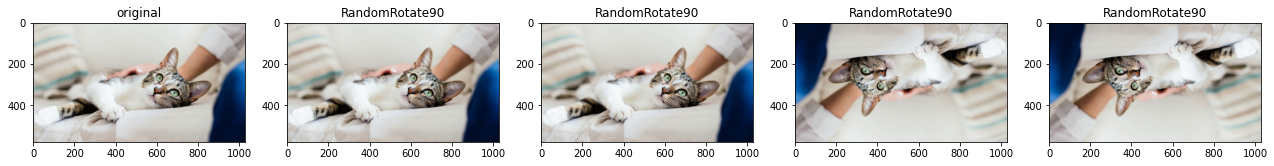

In [11]:
augmentor = A.RandomRotate90(p=1)
repeat_aug(count=4, org_image=org_image, label='RandomRotate90', augmentor=augmentor)

### ShiftScaleRotation
* shift와 scale(zoom), rotate를 함께 또는 별개로 적용 가능. shift_limit, scale_limit, rotate_limit값으로 조정. 
* scale만 적용하려면 shift_limit와 rotate_limt를 0으로 설정. 마찬가지로 shift 또는 rotate만 적용 가능

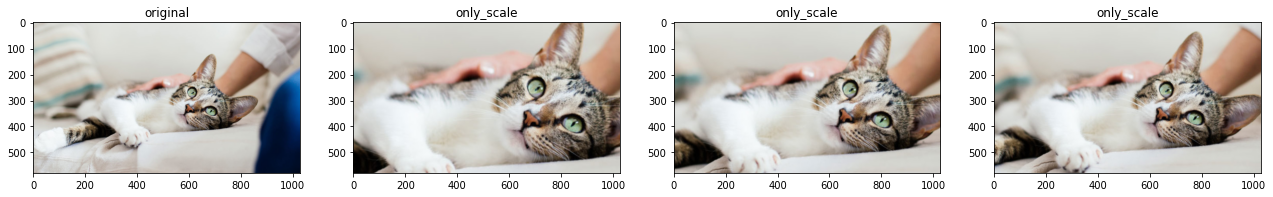

In [12]:
# shift와 rotate을 0으로 설정하면 scale 적용. scale을 0.5 ~ 1.0으로 설정. 
augmentor = A.ShiftScaleRotate (shift_limit=0, scale_limit=(0.5, 1.0), rotate_limit=0, p=1) #나머지를 0으로 설정하면 한 가지 augmentation만 적용가능하다. 
repeat_aug(count=3, org_image=org_image, label='only_scale', augmentor=augmentor)

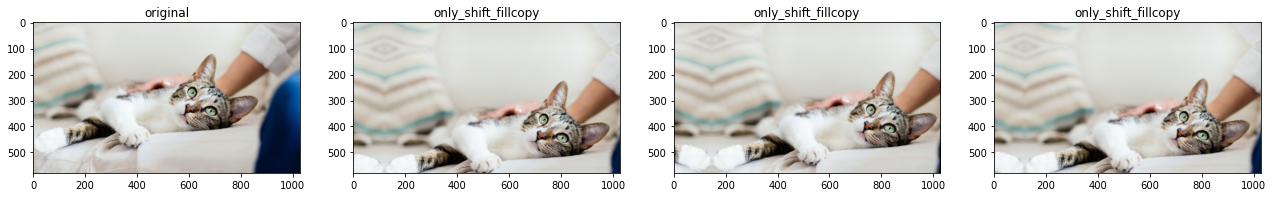

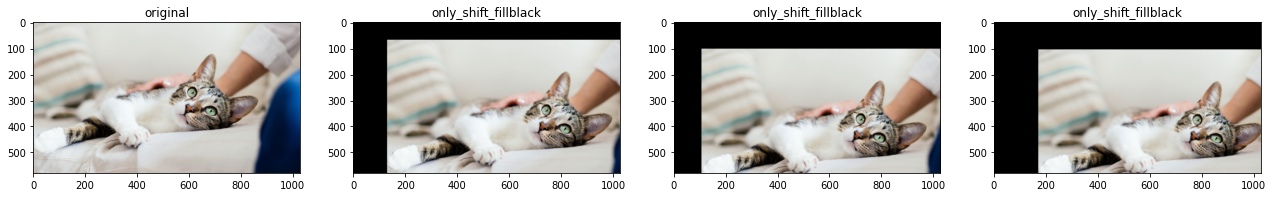

In [13]:
# 이동 후 남게 되는 Border를 Near 영역이미지로 복사
augmentor = A.ShiftScaleRotate (shift_limit=(0.2, 0.1), scale_limit=0, 
                                rotate_limit=0, p=1)
repeat_aug(count=3, org_image=org_image, label='only_shift_fillcopy', augmentor=augmentor)

# 이동 후 남게 되는 border를 검은색으로 fill
augmentor = A.ShiftScaleRotate (shift_limit=(0.2, 0.1), scale_limit=0, 
                                rotate_limit=0, border_mode=cv2.BORDER_CONSTANT, p=1)
repeat_aug(count=3, org_image=org_image, label='only_shift_fillblack', augmentor=augmentor)

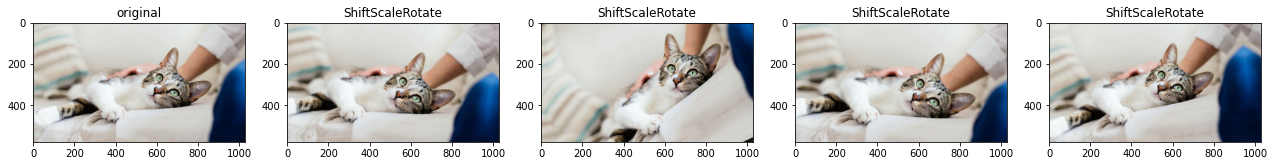

In [14]:
# Shift, Scale, Rotate를 한꺼번에 적용. 
augmentor = A.ShiftScaleRotate (p=1)
repeat_aug(count=4, org_image=org_image, label='ShiftScaleRotate', augmentor=augmentor)

### Compose() 를 이용하여 여러 Augmentation를 체인 형태로 연속 적용. 
* compose 자체도 확률을 적용할 수 있음. Default는 p=1

Albumentations은 여러 변환 객체들을 pipeline 형태로 이어서 연속적인 변환을 수행할 수 있게 지원 Compose()  API를 통해 인자로 List를 받고 이 List안에 연속적인 변환을 적용할 변환 객체를 입력하여 적용 가능 

- RandomCrop(width=256, height=256)
- HorizontalFlip(p=0.5)
- RandomVrightnessContrast(p=0.2)

In [ ]:
augmentor = A.Compose([
    A.VerticalFlip(p=0.5),
    A.HorizontalFlip(p=0.5)
])

repeat_aug(count=6, org_image=org_image, label='Composite', augmentor=augmentor)
repeat_aug(count=6, org_image=org_image, label='Composite', augmentor=augmentor)

### Crop, CenterCrop, RandomCrop, RandomReSizedCrop
* Crop은 입력된 height, width 값 만큼의 원본 이미지의 특정 영역을 잘라낸 후 원본 사이즈로 다시 Resize하지 않음.
* CenterCrop은 원본 이미지의 중심을 기준으로 입력된 height, width 값 만큼의 영역을 Crop 한 뒤 원본 이미지 사이즈로 Resize하지 않음
* RandomCrop은 입력된 height, width 값 만큼의 영역을 Random하게 Crop 한 뒤 원본 이미지 사이즈로 Resize하지 않음
* RandomResizedCrop은 원본 이미지의 Random한 영역을 잘라낸 후, 입력된 height, width값의 사이즈로 Resize함
* RandomResizedCrop은 어떤 영역을 얼마만큼 잘라내는 지는 알수 없으며, 대략적으로 scale과 ratio를 조정하여 적용.
* Crop, CenterCrop, RadomCrop은 적용 후 반드시 원본 이미지 사이즈로 resize 적용 해야 함. 

In [ ]:
# Crop은 원본 이미지의 특정 영역을 잘라낸 후, 원본 사이즈로 다시 Resize하지 않으므로 유의 필요. 
augmentor = A.Crop(x_min=100, y_min=100, x_max=500, y_max=500, p=1)
aug_image = augmentor(image=org_image)['image']
print('crop image size:', aug_image.shape)
repeat_aug(count=4, org_image=org_image, label='Crop', augmentor=augmentor)

# Crop 적용 후 반드시 아래와 같이 resize 해야 함.(augmentation이후 opencv resize()등을 적용해도 무관)
augmentor = A.Compose([
    A.Crop(x_min=100, y_min=100, x_max=500, y_max=500, p=1),
    A.Resize(578, 1028)
])
aug_image = augmentor(image=org_image)['image']
print('crop and resize image size:', aug_image.shape)
repeat_aug(count=4, org_image=org_image, label='Crop', augmentor=augmentor)

In [ ]:
# CenterCrop은 원본 이미지의 중심을 기준으로 입력된 height, width 값 만큼의 영역을 Crop 한 뒤 원본 이미지 사이즈로 Resize하지 않음. 
augmentor = A.CenterCrop(height=300, width=500, p=1)
aug_image = augmentor(image=org_image)['image']

repeat_aug(count=4, org_image=org_image, label='CenterCrop', augmentor=augmentor)
print('centercrop image size:', aug_image.shape)

# CenterCrop 후에는 반드시 아래와 같이 resize 해야 함.(augmentation이후 opencv resize()등을 적용해도 무관)
augmentor = A.Compose([
    A.CenterCrop(height=300, width=500, p=1),
    A.Resize(578, 1028)
])
aug_image = augmentor(image=org_image)['image']
print('centercrop and resize image size:', aug_image.shape)
repeat_aug(count=4, org_image=org_image, label='CenterCrop_resize', augmentor=augmentor)

In [ ]:
# RandomCrop은 height, width 값 만큼의 영역을 Random하게 Crop 한 뒤 원본 이미지 사이즈로 Resize하지 않음. 
augmentor = A.RandomCrop(height=400, width=800, p=1)
aug_image = augmentor(image=org_image)['image']

repeat_aug(count=4, org_image=org_image, label='random_crop', augmentor=augmentor)
print('centercrop image size:', aug_image.shape)

# RandomCrop 후에는 반드시 아래와 같이 resize 해야 함.(augmentation이후 opencv resize()등을 적용해도 무관)
augmentor = A.Compose([
    A.RandomCrop(height=400, width=800, p=1),
    A.Resize(578, 1028)
])
aug_image = augmentor(image=org_image)['image']
print('centercrop and resize image size:', aug_image.shape)
repeat_aug(count=4, org_image=org_image, label='random_crop', augmentor=augmentor)

In [ ]:
# RandomResizedCrop은 원본 이미지의 Random한 영역을 잘라낸 후, 입력된 height, width값의 사이즈로 Resize함.  
# 어떤 영역을 잘라내는 지는 알수 없으며, 대략적으로 scale과 ratio를 조정하여 적용.  
augmentor = A.RandomResizedCrop(height=400, width=500)
aug_image = augmentor(image=org_image)['image']

repeat_aug(count=4, org_image=org_image, label='RandomResizedCrop', augmentor=augmentor)

In [ ]:
# RandomResizedCrop은 원본 이미지의 특정 영역을 잘라낸 후, 입력된 height, width값의 사이즈로 Resize함.  
# scale은 crop할 임의의 영역의 원본 이미지 대비 크기 비율. 
# 원본 height가 100, width가 100이고 scale이 (0.5, 1) 이면 최소 width x height를 50% ~100% 사이를 crop 한 뒤 입력된 height, width값으로 resize함.
# ratio는 crop할 임의의 영역의 가로 세로 비율 
augmentor = A.RandomResizedCrop(height=579, width=1028, scale=(0.5, 0.9), p=1)
aug_image = augmentor(image=org_image)['image']

repeat_aug(count=4, org_image=org_image, label='RandomResizedCrop', augmentor=augmentor)

In [ ]:
aug_image.shape

### RandomBrightnessContrast
* 과거 버전은 RandomBrightness와 RandomConstrast가 별도로 존재하였으나 이후 RandomBrightnessContrast로 통합. 
* 밝기와 대비를 함께 조절 
* brightness_limit와 contrast_limit로 조절

In [ ]:
augmentor = A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), p=1)
repeat_aug(count=4, org_image=org_image, label='bright_contrast', augmentor=augmentor)

augmentor = A.RandomBrightnessContrast(brightness_limit=(0, 0.2), contrast_limit=(0, 0.2), p=1)
repeat_aug(count=4, org_image=org_image, label='bright_contrast', augmentor=augmentor)

# 밝기는 고정하고 대비만 변경. 
augmentor = A.RandomBrightnessContrast(brightness_limit=0, contrast_limit=(0, 0.2), p=1)
repeat_aug(count=4, org_image=org_image, label='bright_contrast', augmentor=augmentor)

### HueSaturationValue()
* Hue, Saturation, Value 각각을 특정 범위내에서 임의로 변경
* hue_shift_limit: -20 ~ 20(Default) sat_shift_limit: -30 ~ 30(Default) val_shift_limit: -20 ~ 20(Default)

In [ ]:
import albumentations as A

augmentor = A.HueSaturationValue(p=1)
repeat_aug(count=4, org_image=org_image, label='HueSaturationValue', augmentor=augmentor)

### RGBShift()
* RGB 값 각각을 특정 범위내에서 임의로 변경
* r_shift_limit: -20 ~ 20(Default) g_shift_limit: -20 ~ 20(Default) b_shift_limit: -20 ~ 20(Default)

In [ ]:
augmentor = A.RGBShift(p=1)
repeat_aug(count=4, org_image=org_image, label='RGBShift', augmentor=augmentor)

### ChannelShuffle()
* RGB 채널축을 임의로 변경
* RGB->GBR/GRB/RBG/BGR/BRG 등으로 변경

In [ ]:
augmentor = A.ChannelShuffle(p=1)
repeat_aug(count=4, org_image=org_image, label='RGBShift', augmentor=augmentor)

In [ ]:
augmentor_hsv = A.HueSaturationValue(p=1)
augmentor_rgb = A.RGBShift(p=1)
augmentor_channel = A.ChannelShuffle(p=1)
repeat_aug(count=4, org_image=org_image, label='HSV', augmentor=augmentor_hsv)
repeat_aug(count=4, org_image=org_image, label='RGBShift', augmentor=augmentor_rgb)
repeat_aug(count=4, org_image=org_image, label='ChannelShuffle', augmentor=augmentor_channel)

### ColorJitter
* 밝기(Brightness), 대비(Contrast), 채도(Saturation), Hue(색상)을 임의값으로 변경. 
* brightness, contrast, saturation, hue값으로 조정. 

In [ ]:
augmentor_hsv = A.ColorJitter(p=1)
repeat_aug(count=4, org_image=org_image, label='ColorJitter', augmentor=augmentor_hsv)

### Gaussian Noise
* Gaussian 분포를 가지는 Noise를 원본 이미지에 추가.

In [ ]:
augmentor = A.GaussNoise(p=1, var_limit=(100, 200))
repeat_aug(count=2, org_image=org_image, label='GaussNoise', augmentor=augmentor)

### Cutout, CoarseDropout
* 임의의 noise hole을 원본 이미지에 추가할 수 있음. Cutout과 CoarseDropout의 차이는 정사각형 Noise인가, 직사각형 Noise인가의 차이

In [ ]:
augmentor = A.Cutout(p=1)
repeat_aug(count=2, org_image=org_image, label='Cutout', augmentor=augmentor)

augmentor = A.CoarseDropout(p=1, max_holes=26)
repeat_aug(count=2, org_image=org_image, label='CoarseDropout', augmentor=augmentor)

### CLAHE(Contrast-limited adaptive histogram equalization)
* 발전된 Histogram equalization(히스토그램 균일화) 기법인 CLAHE를 적용하여 원본 이미지 보다 명암대비가 선명한 이미지 재생

In [ ]:
augmentor_hsv = A.CLAHE(p=1, clip_limit=4)
repeat_aug(count=2, org_image=org_image, label='CLAHE', augmentor=augmentor_hsv)

### Blur, GaussianBlur
* 전체적인 경계선을 흐리게 하거나 Noise를 제거하는 효과(Smoothing). blurring을 위한 filter 를 적용함. 
* 일반적인 Blur는 filter kernel size내의 픽셀값을 평균함. Gaussian Blur는 Gaussian 함수를 통해 kernel 값을 생성
* kernel size는 blur_limit 로 조절되며, kernel size가 클수록 이미지가 더 흐림. 
* Gaussian blur의 경우는 kernel size가 홀수가 되어야 함. 따라서 blur_limit에 짝수값은 입력 될 수 없음. 

In [ ]:
augmentor = A.Blur(p=1, blur_limit=(7, 10))
repeat_aug(count=4, org_image=org_image, label='Blur', augmentor=augmentor)

# GaussianBlur의 blur_limit 즉 kernel size는 홀수가 되어야 함. 따라서 blur_limit=(3, 8)과 같이 짝수를 입력하면 안됨. 
augmentor = A.GaussianBlur(p=1, blur_limit=(11, 15))
repeat_aug(count=4, org_image=org_image, label='GaussBlur', augmentor=augmentor)

### 날씨 효과와 같은 Noise 추가

In [ ]:
augmentor = A.RandomRain(p=1)
repeat_aug(count=2, org_image=org_image, label='Rain', augmentor=augmentor)

augmentor = A.RandomShadow(p=1)
repeat_aug(count=2, org_image=org_image, label='Shadow', augmentor=augmentor)

augmentor = A.RandomSnow(p=1)
repeat_aug(count=2, org_image=org_image, label='Snow', augmentor=augmentor)

### Compose() 를 이용하여 여러 Augmentation를 체인 형태로 연속 적용. 

In [ ]:
augmentor = A.Compose([
    A.CenterCrop(height=300, width=800),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.Resize(579, 1024, p=1)
])
repeat_aug(count=4, org_image=org_image, label='Composite', augmentor=augmentor)

In [ ]:
# Compose() 변환 역시 확률을 적용할 수 있음. Default는 p=1
augmentor = A.Compose([
    A.CenterCrop(height=300, width=800, p=1.0),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.Resize(579, 1024, p=1)
], p=0.5)
repeat_aug(count=4, org_image=org_image, label='Composite', augmentor=augmentor)

### OneOf()를 이용하여 여러개의 변환 중 하나의 변환을 선택적으로 적용

In [ ]:
# OneOf() 내에서 VerticalFlip, HorizontalFlip, RandomBrightnessContrast를 각각을 p=1 로 부여했지만 연속해서 Augmentation이 적용 되지 않고, 개별 변환만 적용됨
augmentor = A.OneOf([
    A.VerticalFlip(p=1),
    A.HorizontalFlip(p=1),
    A.Rotate(limit=(45, 90), p=1, border_mode=cv2.BORDER_CONSTANT)
    ], p=1)
repeat_aug(count=4, org_image=org_image, label='OneOf', augmentor=augmentor)

In [ ]:
augmentor = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.ShiftScaleRotate(p=0.5),
    A.OneOf([
        A.CLAHE(p=0.3),
        A.Blur(blur_limit=(10, 15), p=0.3)
    ], p=0.5)
])
repeat_aug(count=4, org_image=org_image, label='OneOf', augmentor=augmentor)
repeat_aug(count=4, org_image=org_image, label='OneOf', augmentor=augmentor)